In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Ckpt paths
llama2_path = '/scratch/sux7mp/saved_models/llama2.pth'
memit_path = '/scratch/sux7mp/saved_models/checkpoint_20240126_064240.pth'
memit_wanda35_path = '/scratch/sux7mp/saved_models/checkpoint_20240126_064648.pth'

ckpt_paths = [llama2_path, memit_path, memit_wanda35_path]
layers = [3, 4, 5]  # Layers to plot
titles = ["Original model", "After editing", "After editing and compression"]  # Titles for each model


In [5]:
def plot_layer_distributions(ckpt_paths, layers, titles):
    num_layers = len(layers)
    fig, axs = plt.subplots(num_layers, 1, figsize=(10, 6 * num_layers))

    for i, layer_number in enumerate(layers):
        ax = axs[i] if num_layers > 1 else axs

        for j, ckpt_path in enumerate(ckpt_paths):
            state_dict = torch.load(ckpt_path, map_location='cuda')
            layer_key_prefix = f'model.layers.{layer_number}.'

            # Process parameters in batches
            layer_params = []
            batch_size = 10000  # Adjust batch size as needed
            for key in state_dict:
                if key.startswith(layer_key_prefix):
                    tensor = state_dict[key].to(dtype=torch.float16)  # Convert to float16
                    for start in range(0, tensor.numel(), batch_size):
                        end = min(start + batch_size, tensor.numel())
                        batch = tensor.flatten()[start:end].cpu().numpy()
                        layer_params.extend(batch)

            ax.hist(layer_params, bins=500, color=f'C{j}', alpha=1.0, density=True, histtype='step', label=titles[j])
            del state_dict

        ax.set_title(f'Distribution in Layer {layer_number + 1}')
        ax.set_xlabel('Parameter Value')
        ax.set_ylabel('Density')
        ax.grid(True)
        ax.set_xlim(-0.3, 0.3)
        ax.legend()

    plt.tight_layout()
    plt.show()

plot_layer_distributions(ckpt_paths, layers, titles)


: 

: 

In [ ]:
def plot_layer_distributions(state_dicts, layers, titles):
    num_layers = len(layers)
    num_models = len(state_dicts)

    # Create subplots - one row for each layer
    fig, axs = plt.subplots(num_layers, 1, figsize=(10, 6 * num_layers))

    for i, layer_number in enumerate(layers):
        ax = axs[i] if num_layers > 1 else axs

        for j, state_dict in enumerate(state_dicts):
            # Prefix for the layer in the state dict
            layer_key_prefix = f'model.layers.{layer_number}.'

            # Gather all parameter values for the specified layer
            layer_params = []
            for key in state_dict:
                if key.startswith(layer_key_prefix):
                    params = state_dict[key].to(dtype=torch.float32).flatten().cpu().numpy()
                    layer_params.extend(params)

            # Plotting the distribution of the parameters
            ax.hist(layer_params, bins=500, color=f'C{j}', alpha=1.0, density=True, histtype='step', label=titles[j])

        ax.set_title(f'Distribution in Layer {layer_number + 1}')
        ax.set_xlabel('Parameter Value')
        ax.set_ylabel('Density')
        ax.grid(True)
        ax.set_xlim(-0.3, 0.3)
        ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage
state_dicts = [llama2, memit, memit_wanda35]  # Replace with your state dicts
layers = [3, 4, 5]  # Layers to plot
titles = ["Original model", "After editing", "After editing and compression"]  # Titles for each model

plot_layer_distributions(state_dicts, layers, titles)

NameError: name 'llama2' is not defined

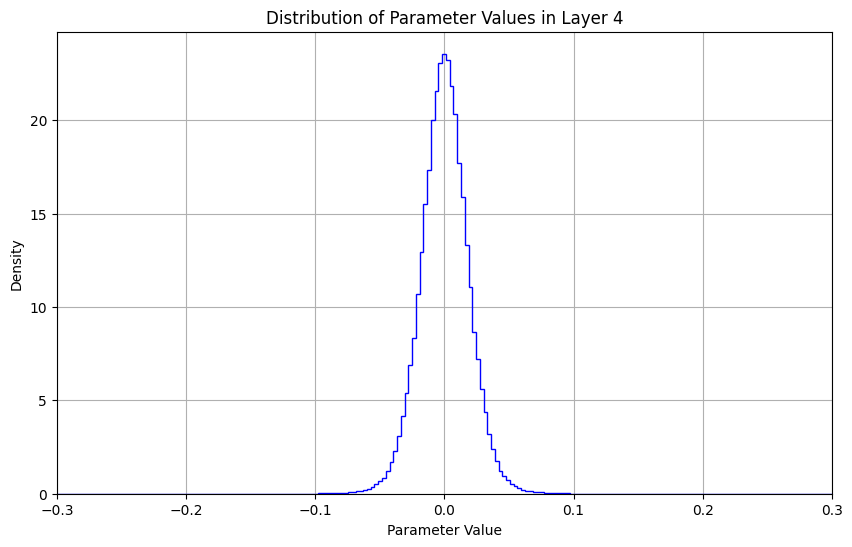

In [14]:
# Plotting the distribution of the parameters
plt.figure(figsize=(10, 6))

# Density histogram without filling under the curve
plt.hist(layer_params, bins=500, color='blue', alpha=1.0, density=True, histtype='step')

plt.title(f'Distribution of Parameter Values in Layer {layer_number + 1}')
plt.xlabel('Parameter Value')
plt.ylabel('Density')
plt.grid(True)

# Limit x-axis range
plt.xlim(-0.3, 0.3)

plt.show()

In [4]:
# The key for the 4th layer weights in Llama2 model 
# (Replace 'layer4.weight' with the correct key for your model)
layer_key = f'model.layers.{3}.weight'  # Indexing starts from 0, so 3 refers to the 4th layer

# Extract and flatten the parameters of the 4th layer
layer_params = memit_model[layer_key].flatten().numpy()

# Plotting the distribution of the parameters
plt.figure(figsize=(10, 6))
plt.hist(layer_params, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Parameter Values in the 4th Layer')
plt.xlabel('Parameter Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

KeyError: 'model.layers.3.weight'